In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import pickle

In [2]:
df = pd.read_csv('../data/processed/clean_train_data.csv')

In [3]:
df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,3,3,0,4,0,5,2,2,0,5,0.685780,1.059999,0.885463,1,1,12,13,1,0.560096,2,4,2,2,3,3,2,0.599634,5,-0.450944,1,0,1,4,2,0.954913,6,-0.946112,1,1.001096,1,0.369164,4,4,2,8,4,0.436537
1,3,1,3,3,0,2,0,24,1,2,0,2,-0.053066,0.163380,-0.422063,1,1,8,8,2,-0.579271,3,4,1,2,3,1,0,1.207834,5,0.499568,1,0,1,4,3,-0.305537,6,0.617781,1,-0.092989,1,-0.046740,4,4,2,8,4,0.054391
2,3,1,0,3,0,4,0,5,2,2,0,5,0.685780,0.993583,0.837036,1,1,12,13,1,0.362450,2,4,2,2,3,2,2,0.107708,5,-0.301109,1,0,1,4,2,-0.305537,6,0.617781,1,0.920052,1,0.652735,4,4,2,8,4,0.648840
3,3,1,0,3,0,0,0,6,2,2,0,5,0.685780,-1.862315,-0.712625,1,1,13,15,2,-0.579271,3,4,0,3,1,3,0,-0.496020,5,-0.685060,1,2,1,4,2,0.324688,6,0.617781,5,0.798487,2,0.813425,4,4,2,8,0,-0.532981
4,3,1,0,3,0,2,0,15,2,2,0,5,1.424626,0.960375,0.740182,1,1,12,13,1,1.455312,2,4,2,2,3,0,2,0.485596,5,0.225652,1,0,1,4,2,1.585139,6,0.617781,1,0.879531,1,1.730303,4,4,2,8,4,1.023909


In [4]:
reg = setup(data = df, 
                   train_size=0.8,  
                   target = 'SalePrice', 
                   session_id=42,
                  )

,Description,Value
0,session_id,42
1,Target,SalePrice
2,Original Data,"(1359, 49)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,37
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1087, 208)"


In [5]:
best = compare_models(include= ['rf', 
                                'gbr', 
                                'dt', 
                                'lr', 
                                'ada',
                                'lasso'
                               ])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2596,0.1461,0.3770,0.8417,0.1879,1.3135,0.1760
rf,Random Forest Regressor,0.2665,0.1643,0.3993,0.8232,0.1961,1.2947,1.0480
ada,AdaBoost Regressor,0.3461,0.2137,0.4605,0.7661,0.2298,1.6040,0.1430
dt,Decision Tree Regressor,0.4019,0.3460,0.5855,0.6287,0.2653,1.8919,0.0150
lasso,Lasso Regression,0.7569,0.9691,0.9770,-0.0183,0.5504,1.1462,0.0100
lr,Linear Regression,0.5450,9.5146,2.3145,-8.1726,0.3140,1.9735,0.0390


In [6]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2912,0.1738,0.4169,0.8724,0.1945,1.1366
1,0.2509,0.1131,0.3363,0.8425,0.1922,1.5013
2,0.2607,0.1329,0.3645,0.9009,0.1724,2.6339
3,0.1948,0.0631,0.2512,0.9335,0.1383,0.9159
4,0.2371,0.1146,0.3385,0.8385,0.1801,1.1010
5,0.2604,0.1312,0.3622,0.8607,0.1835,0.7962
6,0.2722,0.1689,0.4110,0.7920,0.1886,1.4140
7,0.2823,0.2165,0.4653,0.7738,0.2266,1.4479
8,0.2939,0.2231,0.4723,0.8003,0.2012,0.9024


In [7]:
tune_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2880,0.1872,0.4327,0.8626,0.1893,1.1819
1,0.2393,0.1042,0.3228,0.8549,0.1760,1.1157
2,0.2753,0.1550,0.3937,0.8844,0.1640,1.8096
3,0.1873,0.0680,0.2607,0.9284,0.1294,0.7935
4,0.2305,0.1227,0.3503,0.8270,0.1921,1.1500
5,0.2541,0.1826,0.4273,0.8061,0.1858,0.7466
6,0.2556,0.1555,0.3943,0.8086,0.1826,1.3975
7,0.2682,0.1629,0.4036,0.8298,0.2136,1.3128
8,0.2884,0.2105,0.4588,0.8116,0.2067,1.4755


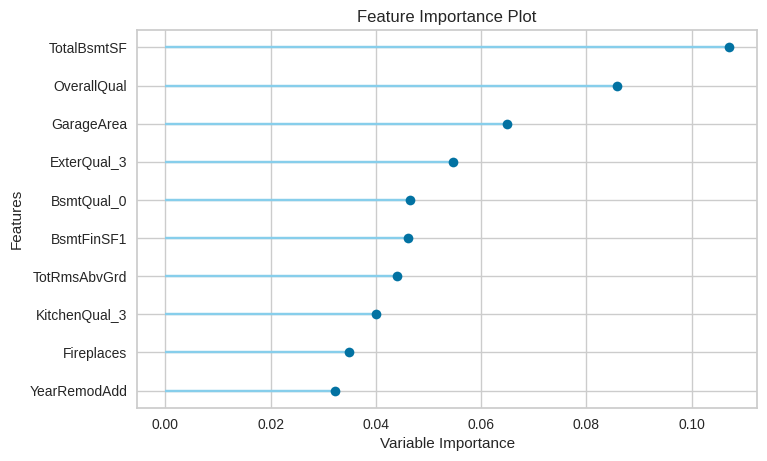

In [8]:
plot_model(tune_gbr, plot='feature')

In [9]:
pred_y = predict_model(tune_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.2525,0.1465,0.3827,0.8512,0.1819,1.3163


In [10]:
final_gbr = finalize_model(tune_gbr)

In [11]:
file = open('../models/ml-models/final_gbr.pkl', 'wb')
pickle.dump(final_gbr, file)